<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/CNN_classification_fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# We check the shape of the data we have just loaded
print("the shape of the input is: {}".format(X_train.shape))
# Given that the input images are 2D, we have to transform them into 3D objects before feeding them into our CNN
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
# We check that the transformation works as intended 
print("the new shape of the input is: {}".format(X_train.shape))

the shape of the input is: (60000, 28, 28)
the new shape of the input is: (60000, 28, 28, 1)


In [4]:
# We find out what is the number of classes we are dealing with
print("the number of classes we have is {}".format(len(np.unique(y_train))))

the number of classes we have is 10


In [5]:
# We build the model 
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,[3,3],input_shape = X_train[0].shape,activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(128,[3,3],activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.2), #dropout layer (for regularization)
                                    tf.keras.layers.Dense(10,activation='softmax')    #output layer
])

In [6]:
# We train the model 
model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
# We fit the model
r = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5715 - accuracy: 0.8033 - val_loss: 0.4453 - val_accuracy: 0.8408
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3846 - accuracy: 0.8583 - val_loss: 0.3944 - val_accuracy: 0.8579
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3473 - accuracy: 0.8719 - val_loss: 0.4347 - val_accuracy: 0.8448
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3254 - accuracy: 0.8797 - val_loss: 0.3699 - val_accuracy: 0.8699
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3090 - accuracy: 0.8850 - val_loss: 0.3564 - val_accuracy: 0.8697
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.8905 - val_loss: 0.3908 - val_accuracy: 0.8683
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2862 - accuracy: 0.8920 - val_loss: 0.3853 - val_accuracy:

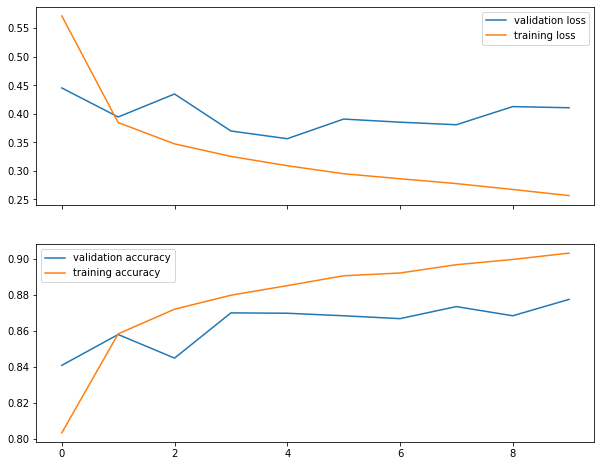

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()